In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.test.is_built_with_cuda()

False

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train.shape

(50000, 1)

In [19]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

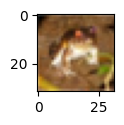

In [26]:
plot_sample(0)

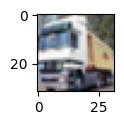

In [27]:
plot_sample(1)

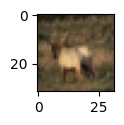

In [30]:
plot_sample(3)

In [31]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [37]:
y_train[3]

array([4], dtype=uint8)

In [38]:
y_train[3][0]

np.uint8(4)

In [39]:
classes[y_train[3][0]]

'deer'

In [40]:
classes[y_train[1][0]]

'truck'

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [45]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [46]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [47]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Model Training

In [50]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [51]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5963 - loss: 1.1422
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6235 - loss: 1.0714
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6385 - loss: 1.0364
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6517 - loss: 0.9940
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6652 - loss: 0.9659
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6708 - loss: 0.9455
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6859 - loss: 0.9109
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6952 - loss: 0.8796
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7071 - loss: 0.8582
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7154 - loss: 0.8273
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7257 - loss: 0.7910
Epoch 12

In [71]:
model.predict(X_test_scaled)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([8.88268232e-01, 9.99863744e-01, 6.75469995e-01, 2.35455204e-03,
       1.14908986e-01, 3.80779570e-03, 2.81109988e-05, 3.14186871e-01,
       9.99996841e-01, 9.99400318e-01], dtype=float32)

In [73]:
classes[y_test[1][0]]

'ship'

In [75]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


np.int64(8)

In [76]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


'ship'

In [77]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5842 - loss: 1.7473


[1.7619528770446777, 0.582099974155426]

# Performance Test

In [82]:
def get_model():
    model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [87]:
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3017 - loss: 1.9323


### *Here my <span style="color:red">CPU</span> took <span style="color:red">34 seconds</span> to run a epoch.*
### At this momment i don't have GPU, but if i had one:
### *<span style="color:red">GPU</span> would take less or equals to <span style="color:red">3 seconds</span> to run the epoch*

In [88]:
import time
import tensorflow as tf

start_time = time.time()

with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

end_time = time.time()
print(f"Total training time for 10 epochs on CPU: {end_time - start_time:.2f} seconds")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3047 - loss: 1.9301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4193 - loss: 1.6455
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4580 - loss: 1.5551
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4787 - loss: 1.4820
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4966 - loss: 1.4347
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5082 - loss: 1.3989
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5268 - loss: 1.3444
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5383 - loss: 1.3192
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5507 - loss: 1.2847
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5617 - loss: 1.2481
Total training time for 10 epochs on CPU: 333.33 seconds


## Let's compare performance:

|  Epochs  |    CPU   |    GPU   |
|----------|----------|----------|
|     1    |    34    |    3     |
|    10    |   333    |   30     |

We can see that GPU scores 11 times faster than CPU in DL model training